# Biodiversity in National Parks - Project

In [54]:
#The purpose of this project is to ascertain the various factors that contribute to biodiversity...
# ...in national parks
# Data for this project was produced by CodeAcademy

Importing Libraries for use:

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


Loading the data from csv files:

In [3]:
df_obs = pd.read_csv('observations.csv')
df_spe = pd.read_csv('species_info.csv')

Looking at the colums for the "observations" dataset and the "species" dataset

In [4]:
print(df_obs.columns)
print()
print(df_spe.columns)

Index(['scientific_name', 'park_name', 'observations'], dtype='object')

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


Diving into the data for some insight discovery:

1) What is the distribution of conservation_status for animals?

2) Are certain types of species more likely to be endangered?

3) Are the differences between species and their conservation status significant?

4) Which species were spotted the most at each park?

#### 1) What is the distribution of conservation_status for animals?

In [6]:
print(df_spe.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


It seems like there are "NaN" values for the conservation status of the animals

In [33]:
con_isna = df_spe['conservation_status'].isna().sum()
con_len = len(df_spe['conservation_status'])

print("Number of Nan-values: " + str(df_spe['conservation_status'].isna().sum()))
print("Total amount of values: " + str(len(df_spe['conservation_status'])))
print("Proportion of Nan to non-nan values: " + str(df_spe['conservation_status']\
                                                    .isna().sum()/len(df_spe['conservation_status'])))
print("Amount of non-na values: " + str(con_len - \
      con_isna))

Number of Nan-values: 5633
Total amount of values: 5824
Proportion of Nan to non-nan values: 0.9672046703296703
Amount of non-na values: 191


In [34]:
df_spe[(df_spe['conservation_status'].notna())].head()

,category,scientific_name,common_names,conservation_status,con_stat_notnan
7,Mammal,Canis latrans,Coyote,Species of Concern,True
8,Mammal,Canis lupus,Gray Wolf,Endangered,True
9,Mammal,Canis rufus,Red Wolf,Endangered,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True


There is less than 5% of the values in the "conservation_status" column that are not "NaN",
we will make a new column for the non-NaN values and do our analysis on those values instead. We will not fill in the missing values with estimated data, since the amount of unknown values is too large to estimate those values accurately:

In [46]:
print(df_spe.conservation_status.value_counts())

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64


In [47]:
df_spe.fillna('No Intervention', inplace=True)
df_spe.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

In [48]:
print(df_spe['category'].value_counts())

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64


We want to be able to compare the "conservation status" with the "category" of endangered species. This way we can understand what types of animals are in danger, and in how much danger

In [50]:
conservationCategory = df_spe[df_spe.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


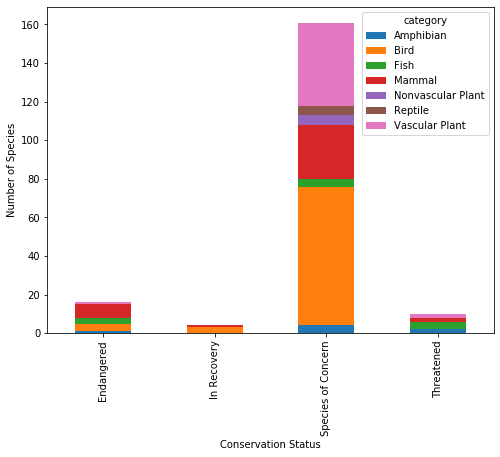

In [51]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

Interpretation: We can see "Species of Concern" is the overwhelming category, with Birds and Vascular Plants making the majority of that group